In [1]:
import json
import os 
import pandas as pd 
import nltk
import re
import pickle
import numpy as np
import matplotlib.pyplot as plt 
import fasttext
from nltk.tokenize import word_tokenize
from pprint import pprint
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [2]:
default_path = '/home/lamda_00/Data-related'
subreddit = 'depression'
# subreddit_id = 't5_2qqqf'   # depression
data_path = os.path.join(default_path, 'data', 'Reddit_origin')
save_path = os.path.join(default_path, 'data', 'Reddit_processed')
model_path = os.path.join(default_path, 'model')

### 1. Dataset 1

In [3]:
rs_2010 = pd.read_csv(os.path.join(save_path, 'rs_nonper_2010.csv'))
rs_2011 = pd.read_csv(os.path.join(save_path, 'rs_nonper_2011.csv'))
rs_2012 = pd.read_csv(os.path.join(save_path, 'rs_nonper_2012.csv'))

In [4]:
rc_2010 = pd.read_csv(os.path.join(save_path, 'rc_nonper_2010.csv'))
rc_2011 = pd.read_csv(os.path.join(save_path, 'rc_nonper_2011.csv'))
rc_2012 = pd.read_csv(os.path.join(save_path, 'rc_nonper_2012.csv'))

In [5]:
len(rs_2010), len(rs_2011), len(rs_2012), len(rc_2010), len(rc_2011), len(rc_2012)

(916, 5222, 17870, 7064, 31208, 99836)

In [36]:
rs_total = pd.concat([rs_2010, rs_2011, rs_2012])
print(f'RS 개수: {len(rs_total)}')
rs_total.head(3)

RS 개수: 24008


,id,subreddit,author,title,context,comments,score,url,created_utc
0,akj8u,depression,SarahC,tramadol - quick fix major depression fix.,"i don't have an addictive personality, so for ...",20.0,16.0,https://www.reddit.com/r/depression/comments/a...,1.262360e+09
1,akp0z,depression,Nico3d3,depression naturals remedies,is there such thing as a naturals remedies for...,0.0,0.0,https://www.reddit.com/r/depression/comments/a...,1.262411e+09
2,al526,depression,unremedied,"am i depressed? also, question regarding depre...",i have not told any other person about my prob...,13.0,9.0,https://www.reddit.com/r/depression/comments/a...,1.262551e+09


In [37]:
rc_total = pd.concat([rc_2010, rc_2011, rc_2012])
print(f'RC 개수: {len(rc_total)}')
rc_total.head(3)

RC 개수: 138108


,id,subreddit,author,comment,ups,downs,score,created_utc
0,t3_akj8u,depression,aenea,i know that there is some research going on ab...,2.0,0.0,2.0,1.262363e+09
1,t3_akj8u,depression,nightshifter,"this sounds very interesting, i would love to ...",2.0,0.0,2.0,1.262363e+09
2,t3_akj8u,depression,mrteapot12475,any good site to get it online?,1.0,0.0,1.0,1.262363e+09


In [38]:
rs_total.to_csv(os.path.join(save_path, 'dataset_01_rs.csv'), index=None)
rc_total.to_csv(os.path.join(save_path, 'dataset_01_rc.csv'), index=None)

### Dataset 2

In [3]:
rs_2010 = pd.read_csv(os.path.join(save_path, 'rs_nonper_2010.csv'))
rs_2011 = pd.read_csv(os.path.join(save_path, 'rs_nonper_2011.csv'))
rs_2012 = pd.read_csv(os.path.join(save_path, 'rs_nonper_2012.csv'))
rs_2013 = pd.read_csv(os.path.join(save_path, 'rs_nonper_2013.csv'))
rs_2014 = pd.read_csv(os.path.join(save_path, 'rs_nonper_2014.csv'))
rs_2015 = pd.read_csv(os.path.join(save_path, 'rs_nonper_2015.csv'))
rs_2016 = pd.read_csv(os.path.join(save_path, 'rs_nonper_2016.csv'))

In [4]:
rc_2010 = pd.read_csv(os.path.join(save_path, 'rc_nonper_2010.csv'))
rc_2011 = pd.read_csv(os.path.join(save_path, 'rc_nonper_2011.csv'))
rc_2012 = pd.read_csv(os.path.join(save_path, 'rc_nonper_2012.csv'))
rc_2013 = pd.read_csv(os.path.join(save_path, 'rc_nonper_2013.csv'))
rc_2014 = pd.read_csv(os.path.join(save_path, 'rc_nonper_2014.csv'))
rc_2015 = pd.read_csv(os.path.join(save_path, 'rc_nonper_2015.csv'))
rc_2016 = pd.read_csv(os.path.join(save_path, 'rc_nonper_2016.csv'))

In [5]:
rc_2010 = rc_2010[['id', 'subreddit', 'author', 'comment', 'ups', 'score', 'created_utc']]
rc_2011 = rc_2011[['id', 'subreddit', 'author', 'comment', 'ups', 'score', 'created_utc']]
rc_2012 = rc_2012[['id', 'subreddit', 'author', 'comment', 'ups', 'score', 'created_utc']]
rc_2013 = rc_2013[['id', 'subreddit', 'author', 'comment', 'ups', 'score', 'created_utc']]
rc_2014 = rc_2014[['id', 'subreddit', 'author', 'comment', 'ups', 'score', 'created_utc']]
rc_2015 = rc_2015[['id', 'subreddit', 'author', 'comment', 'ups', 'score', 'created_utc']]

In [6]:
rc_2016.columns = ['id', 'subreddit', 'author', 'comment', 'ups', 'score', 'created_utc']

In [70]:
rc_2016

,id,subreddit,author,comment,ups,score,created_utc
0,t3_48bugn,depression,Catachaos,who's there?,1.0,1.0,1.456790e+09
1,t3_48b67a,depression,[deleted],[removed],4.0,4.0,1.456791e+09
2,t3_48bugn,depression,Catachaos,i like the naming of bobb. my mum had a cat ca...,2.0,2.0,1.456791e+09
3,t3_48ckgp,depression,Silverkid99,"go lay down and cry, or let your emotions out ...",1.0,1.0,1.456791e+09
4,t3_48ddm6,depression,Silverkid99,"you aren't a failure, you've graduated college...",2.0,2.0,1.456791e+09
...,...,...,...,...,...,...,...
216339,t3_4ugo0c,depression,JaazzHandss,thanks for listening to me.,1.0,1.0,1.470009e+09
216340,t3_4vglqn,depression,whytf_not,never apologize for mcr.,2.0,2.0,1.470009e+09
216341,t3_4vjdrf,depression,thelonelyfootballfan,"hi, i'd really like to talk to you but i don't...",1.0,1.0,1.470009e+09
216342,t3_4vjcb2,depression,LegacyMJT,i understand. one time a week ago i went throu...,7.0,7.0,1.470010e+09


In [71]:
rs_total = pd.concat([rs_2010, rs_2011, rs_2012, rs_2013, rs_2014, rs_2015, rs_2016])
rs_total.reset_index(inplace=True, drop=True)
print(f'RS 개수: {len(rs_total)}')
rs_total.head(3)

RS 개수: 223951


,id,subreddit,author,title,context,comments,score,url,created_utc
0,akj8u,depression,SarahC,tramadol - quick fix major depression fix.,"i don't have an addictive personality, so for ...",20.0,16.0,https://www.reddit.com/r/depression/comments/a...,1.262360e+09
1,akp0z,depression,Nico3d3,depression naturals remedies,is there such thing as a naturals remedies for...,0.0,0.0,https://www.reddit.com/r/depression/comments/a...,1.262411e+09
2,al526,depression,unremedied,"am i depressed? also, question regarding depre...",i have not told any other person about my prob...,13.0,9.0,https://www.reddit.com/r/depression/comments/a...,1.262551e+09


In [72]:
rs_map = rs_total[['id', 'subreddit', 'author', 'comments', 'score', 'url', 'created_utc']]
rs_map

,id,subreddit,author,comments,score,url,created_utc
0,akj8u,depression,SarahC,20.0,16.0,https://www.reddit.com/r/depression/comments/a...,1.262360e+09
1,akp0z,depression,Nico3d3,0.0,0.0,https://www.reddit.com/r/depression/comments/a...,1.262411e+09
2,al526,depression,unremedied,13.0,9.0,https://www.reddit.com/r/depression/comments/a...,1.262551e+09
3,alm54,depression,justbla,2.0,8.0,https://www.reddit.com/r/depression/comments/a...,1.262661e+09
4,ami43,depression,[deleted],4.0,9.0,https://www.reddit.com/r/depression/comments/a...,1.262830e+09
...,...,...,...,...,...,...,...
223946,55aqpl,depression,anonymooseforthewin,2.0,3.0,https://www.reddit.com/r/depression/comments/5...,1.475279e+09
223947,55as8g,depression,strapin,0.0,3.0,https://www.reddit.com/r/depression/comments/5...,1.475279e+09
223948,55asdi,depression,legion_2k,13.0,3.0,https://www.reddit.com/r/depression/comments/5...,1.475279e+09
223949,55asx6,depression,ijusttriedthaifood,6.0,19.0,https://www.reddit.com/r/depression/comments/5...,1.475280e+09


In [73]:
rc_total = pd.concat([rc_2010, rc_2011, rc_2012, rc_2013, rc_2014, rc_2015, rc_2016])
rc_total.reset_index(inplace=True, drop=True)
print(f'RC 개수: {len(rc_total)}')
rc_total.head(3)

RC 개수: 816714


,id,subreddit,author,comment,ups,score,created_utc
0,t3_akj8u,depression,aenea,i know that there is some research going on ab...,2.0,2.0,1.262363e+09
1,t3_akj8u,depression,nightshifter,"this sounds very interesting, i would love to ...",2.0,2.0,1.262363e+09
2,t3_akj8u,depression,mrteapot12475,any good site to get it online?,1.0,1.0,1.262363e+09


In [74]:
rc_map = rc_total[['id', 'subreddit', 'author', 'ups', 'score', 'created_utc']]
rc_map 

,id,subreddit,author,ups,score,created_utc
0,t3_akj8u,depression,aenea,2.0,2.0,1.262363e+09
1,t3_akj8u,depression,nightshifter,2.0,2.0,1.262363e+09
2,t3_akj8u,depression,mrteapot12475,1.0,1.0,1.262363e+09
3,t3_akj8u,depression,[deleted],2.0,2.0,1.262363e+09
4,t3_akj8u,depression,SarahC,2.0,2.0,1.262364e+09
...,...,...,...,...,...,...
816709,t3_4ugo0c,depression,JaazzHandss,1.0,1.0,1.470009e+09
816710,t3_4vglqn,depression,whytf_not,2.0,2.0,1.470009e+09
816711,t3_4vjdrf,depression,thelonelyfootballfan,1.0,1.0,1.470009e+09
816712,t3_4vjcb2,depression,LegacyMJT,7.0,7.0,1.470010e+09


In [75]:
rs_text_list = [context.split('.') for context in rs_total.context.values.tolist()]
len(rs_text_list)

223951

In [76]:
rc_total.isna().sum()

id             0
subreddit      0
author         0
comment        0
ups            0
score          0
created_utc    0
dtype: int64

In [77]:
rc_text_list = [context.split('.') for context in rc_total.comment.values.tolist()]
len(rc_text_list)

816714

In [78]:
for idx in range(len(rs_text_list)):
    rs_text_list[idx] = [text.strip() for text in rs_text_list[idx] if text != '']
    
for idx in range(len(rs_text_list)):
    rc_text_list[idx] = [text.strip() for text in rc_text_list[idx] if text != '']

In [79]:
def cleanse_text(text):
    if isinstance(text, float):
        return []

    text = text.lower()   # lower case
    text = re.sub(r"http\S*|\S*\.com\S*|\S*www\S*", " ", text)    # delete url 
    text = re.sub(r"\s@\S+", " ", text)   # delete @mentions
    text = re.sub(r"\s+", " ", text)   # replace all whitespace with a single space
    text = text.strip()    # strip off spaces on either end

    if len(text) < 6: 
        return ''
    return text

In [80]:
rs_df = []

for idx in range(len(rs_text_list)):
    for text in rs_text_list[idx]:
        if text == '':
            continue
        
        text = text.strip()
        rs_df.append([rs_total.id[idx], 'post', text, 0])

In [92]:
rs_df = pd.DataFrame(rs_df, columns=['id', 'type', 'text', 'label'])

In [93]:
rc_df = []

for idx in range(len(rc_text_list)):
    for text in rc_text_list[idx]:
        if text == '':
            continue
        
        text = text.strip()
        rc_df.append([rc_total.id[idx], 'comment', text, 0])

In [94]:
rc_df = pd.DataFrame(rc_df, columns=['id', 'type', 'text', 'label'])
print(f'RC 개수: {len(rc_df)}')

RC 개수: 3508923


In [95]:
dataset2 = pd.concat([rs_df, rc_df])
dataset2.reset_index(inplace=True, drop=True)

In [96]:
dataset2.text = dataset2.text.apply(cleanse_text)

In [97]:
dataset2 = dataset2[dataset2.text != '']
dataset2

,id,type,text,label
0,akj8u,post,"i don't have an addictive personality, so for ...",0
1,akj8u,post,"before i was taking it, the depressive episode...",0
2,akj8u,post,i occasionally look drunk,0
3,akj8u,post,"but, in the last 28 months i've kept a high st...",0
4,akj8u,post,i've had problems with drive - that's possibly...,0
...,...,...,...,...
5728372,t3_4vjcb2,comment,one time a week ago i went through my day as u...,0
5728373,t3_4vjcb2,comment,"i then was like ""wow that's what my voice soun...",0
5728374,t3_4vjdrf,comment,you can click on their username at the top of ...,0
5728375,t3_4vjdrf,comment,"at the bottom it should say ""leave a message"" ...",0


In [98]:
dataset2 = dataset2[dataset2.text!='[removed]']
dataset2

,id,type,text,label
0,akj8u,post,"i don't have an addictive personality, so for ...",0
1,akj8u,post,"before i was taking it, the depressive episode...",0
2,akj8u,post,i occasionally look drunk,0
3,akj8u,post,"but, in the last 28 months i've kept a high st...",0
4,akj8u,post,i've had problems with drive - that's possibly...,0
...,...,...,...,...
5728372,t3_4vjcb2,comment,one time a week ago i went through my day as u...,0
5728373,t3_4vjcb2,comment,"i then was like ""wow that's what my voice soun...",0
5728374,t3_4vjdrf,comment,you can click on their username at the top of ...,0
5728375,t3_4vjdrf,comment,"at the bottom it should say ""leave a message"" ...",0


In [99]:
other_post_idx = dataset2[dataset2.text.str.contains('r/')].index 
dataset2.drop(other_post_idx, inplace=True)
dataset2.reset_index(inplace=True, drop=True)
dataset2

/tmp/ipykernel_8672/1616992867.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.drop(other_post_idx, inplace=True)


,id,type,text,label
0,akj8u,post,"i don't have an addictive personality, so for ...",0
1,akj8u,post,"before i was taking it, the depressive episode...",0
2,akj8u,post,i occasionally look drunk,0
3,akj8u,post,"but, in the last 28 months i've kept a high st...",0
4,akj8u,post,i've had problems with drive - that's possibly...,0
...,...,...,...,...
5590740,t3_4vjcb2,comment,one time a week ago i went through my day as u...,0
5590741,t3_4vjcb2,comment,"i then was like ""wow that's what my voice soun...",0
5590742,t3_4vjdrf,comment,you can click on their username at the top of ...,0
5590743,t3_4vjdrf,comment,"at the bottom it should say ""leave a message"" ...",0


In [89]:
dataset2[dataset2.text.str.contains('removed')]

,id,type,text,label
3556,dbkng,post,had a falling out with my mother that eventual...,0
4353,dmfg8,post,what should i be doing if anything at all? wha...,0
15151,frim7,post,where do you go when life doesn't make any fuc...,0
17369,g55yy,post,"no wait, imagine that your brain is surgically...",0
21924,gtcjk,post,"in the next few weeks, i am going to have a sm...",0
...,...,...,...,...
5585938,t3_4vam6z,comment,"removed, the rule against advertising yourself...",0
5587870,t3_4ve5ds,comment,promoting or advocating specific treatment is ...,0
5587929,t3_4ve95p,comment,i've removed this,0
5588043,t3_4vemil,comment,posts such as this are not allowed and i've re...,0


In [100]:
removed_idx = dataset2[dataset2.text.str.contains('removed')].index
dataset2.drop(removed_idx, inplace=True)
dataset2.reset_index(inplace=True, drop=True)
dataset2.to_csv(os.path.join(save_path, 'dataset2_origin.csv'), index=None)

/tmp/ipykernel_8672/2872118768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset2.drop(removed_idx, inplace=True)


In [101]:
dataset2

,id,type,text,label
0,akj8u,post,"i don't have an addictive personality, so for ...",0
1,akj8u,post,"before i was taking it, the depressive episode...",0
2,akj8u,post,i occasionally look drunk,0
3,akj8u,post,"but, in the last 28 months i've kept a high st...",0
4,akj8u,post,i've had problems with drive - that's possibly...,0
...,...,...,...,...
5589273,t3_4vjcb2,comment,one time a week ago i went through my day as u...,0
5589274,t3_4vjcb2,comment,"i then was like ""wow that's what my voice soun...",0
5589275,t3_4vjdrf,comment,you can click on their username at the top of ...,0
5589276,t3_4vjdrf,comment,"at the bottom it should say ""leave a message"" ...",0


In [104]:
word_list = [word_tokenize(context) for context in dataset2.text.values.tolist()]

In [ ]:
len(word_list)

In [ ]:
print(f'토큰(중위 값) : {np.median(list(map(len, word_list)))}')
print(f'토큰(평균 값) : {np.mean(list(map(len, word_list)))}')
plt.hist([len(word) for word in word_list], bins=50)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

#### 2.1 최대 토큰 길이 제한  (32)

In [105]:
idx_word = []

for idx in range(len(word_list)):
    if len(word_list[idx]) <= 32:
        idx_word.append(idx)

In [106]:
dataset2_after = dataset2.copy()

In [107]:
dataset2_after = dataset2_after.loc[idx_word]

In [110]:
len(dataset2), len(dataset2_after)

(5589278, 5088846)

In [111]:
dataset2_after.reset_index(inplace=True, drop=True)
dataset2_after

,id,type,text,label
0,akj8u,post,"i don't have an addictive personality, so for ...",0
1,akj8u,post,i occasionally look drunk,0
2,akj8u,post,"but, in the last 28 months i've kept a high st...",0
3,akj8u,post,i've had problems with drive - that's possibly...,0
4,akj8u,post,it's been life transforming,0
...,...,...,...,...
5088841,t3_4vjcb2,comment,i understand,0
5088842,t3_4vjcb2,comment,one time a week ago i went through my day as u...,0
5088843,t3_4vjcb2,comment,"i then was like ""wow that's what my voice soun...",0
5088844,t3_4vjdrf,comment,you can click on their username at the top of ...,0


In [112]:
dataset2_after.reset_index(inplace=True, drop=True)

In [113]:
dataset2_after.to_csv(os.path.join(save_path, 'dataset2.csv'), index=None)

In [114]:
ck_list = []

for idx in range(len(dataset2_after)):
    if re.findall("[a-zA-Z]\/[a-zA-Z]", dataset2_after.text[idx]) != []:
        ck_list.append(idx)
        
len(ck_list)   # 52625

52635

In [115]:
dataset2_after.drop(ck_list, inplace=True)
dataset2_after.reset_index(inplace=True, drop=True)
dataset2_after.to_csv(os.path.join(save_path, 'dataset2_processed.csv'), index=None)

In [117]:
word_list2 = [word_tokenize(context) for context in dataset2_after.text.values.tolist()]

토큰(중위 값) : 13.0
토큰(평균 값) : 13.794305480846612


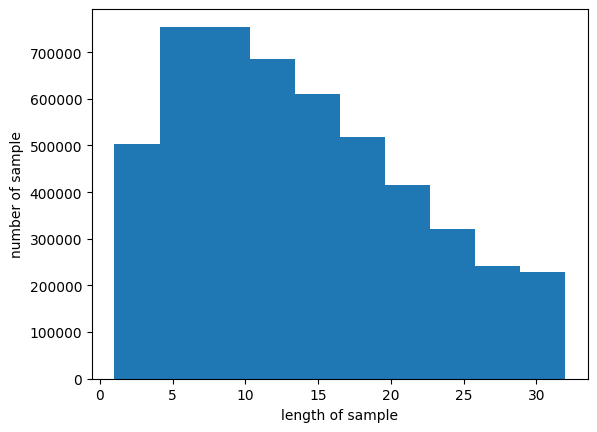

In [118]:
print(f'토큰(중위 값) : {np.median(list(map(len, word_list2)))}')
print(f'토큰(평균 값) : {np.mean(list(map(len, word_list2)))}')
plt.hist([len(word) for word in word_list2], bins=10)
plt.xlabel('length of sample')
plt.ylabel('number of sample')
plt.show()

In [116]:
dataset2

,id,type,text,label
0,akj8u,post,"i don't have an addictive personality, so for ...",0
1,akj8u,post,i occasionally look drunk,0
2,akj8u,post,"but, in the last 28 months i've kept a high st...",0
3,akj8u,post,i've had problems with drive - that's possibly...,0
4,akj8u,post,it's been life transforming,0
...,...,...,...,...
5036206,t3_4vjcb2,comment,i understand,0
5036207,t3_4vjcb2,comment,one time a week ago i went through my day as u...,0
5036208,t3_4vjcb2,comment,"i then was like ""wow that's what my voice soun...",0
5036209,t3_4vjdrf,comment,you can click on their username at the top of ...,0


### 3. Dataset 2 Filtering 

In [16]:
import gensim
import urllib.request

In [17]:
data_path

'/home/lamda_00/Data-related/data/Reddit_origin'

In [3]:
dataset2 = pd.read_csv(os.path.join(save_path, 'dataset2_processed.csv'))
dataset2.head(3)

,id,type,text,label
0,akj8u,post,"i don't have an addictive personality, so for ...",0
1,akj8u,post,i occasionally look drunk,0
2,akj8u,post,"but, in the last 28 months i've kept a high st...",0


In [4]:
dataset2

,id,type,text,label
0,akj8u,post,"i don't have an addictive personality, so for ...",0
1,akj8u,post,i occasionally look drunk,0
2,akj8u,post,"but, in the last 28 months i've kept a high st...",0
3,akj8u,post,i've had problems with drive - that's possibly...,0
4,akj8u,post,it's been life transforming,0
...,...,...,...,...
5036206,t3_4vjcb2,comment,i understand,0
5036207,t3_4vjcb2,comment,one time a week ago i went through my day as u...,0
5036208,t3_4vjcb2,comment,"i then was like ""wow that's what my voice soun...",0
5036209,t3_4vjdrf,comment,you can click on their username at the top of ...,0


#### 3.2 Word2Vec Training

In [20]:
from nltk.corpus import stopwords

In [21]:
from nltk.tokenize import word_tokenize

total_tok = [word_tokenize(sentence) for sentence in dataset2.text.values.tolist()]
model = Word2Vec(sentences=total_tok, vector_size=100, window=5, min_count=5, workers=8, sg=0)
model.wv.save_word2vec_format(os.path.join(model_path,'word2vec_reddit_7y'))

In [22]:
dataset2

,id,type,text,label
0,akj8u,post,"i don't have an addictive personality, so for ...",0
1,akj8u,post,i occasionally look drunk,0
2,akj8u,post,"but, in the last 28 months i've kept a high st...",0
3,akj8u,post,i've had problems with drive - that's possibly...,0
4,akj8u,post,it's been life transforming,0
...,...,...,...,...
5036206,t3_4vjcb2,comment,i understand,0
5036207,t3_4vjcb2,comment,one time a week ago i went through my day as u...,0
5036208,t3_4vjcb2,comment,"i then was like ""wow that's what my voice soun...",0
5036209,t3_4vjdrf,comment,you can click on their username at the top of ...,0


In [23]:
total_tok = [word_tokenize(sentence) for sentence in dataset2.text.values.tolist()]
len(total_tok)

5036211

In [24]:
print('총 샘플의 개수 : {}'.format(len(total_tok)), end='\n\n')
for tok in total_tok[:3]:
    print(tok)

총 샘플의 개수 : 5036211

['i', 'do', "n't", 'have', 'an', 'addictive', 'personality', ',', 'so', 'for', 'the', 'last', '2', 'years', 'i', "'ve", 'been', 'supplementing', 'my', 'anti', 'depressants', 'with', 'tramadol']
['i', 'occasionally', 'look', 'drunk']
['but', ',', 'in', 'the', 'last', '28', 'months', 'i', "'ve", 'kept', 'a', 'high', 'stress', ',', 'fast', 'paced', 'it', 'job', 'and', 'excelled', 'at', 'it']


In [25]:
model = Word2Vec(sentences=total_tok, vector_size=100, window=5, min_count=5, workers=8, sg=0)

In [26]:
model.wv.save_word2vec_format(os.path.join(model_path,'word2vec_reddit_7y'))

In [27]:
model = KeyedVectors.load_word2vec_format(os.path.join(model_path,'word2vec_reddit_7y'))

In [28]:
word = ['depressed', 'lethargic', 'appetite', 'weight', 'insomnia', 'hypersomnia', 'sleep', 'agitation', 'retardation',\
        'fatigue', 'worthless', 'guilt', 'concentrate', 'indecisive', 'suicidal', 'die']

In [29]:
print(f'word: {word[-1]}')
list(map(lambda x: x[0], model.most_similar(word[0], topn=10)))

word: die


['sad',
 'unhappy',
 'lonely',
 'unwell',
 'paranoid',
 'homesick',
 'horny',
 'miserable',
 'depressed-',
 'upset']

In [30]:
model.similar_by_word('sucidal', topn=100)

[('intrusive', 0.7988453507423401),
 ('suicidal', 0.7841625213623047),
 ('homicidal', 0.7451829314231873),
 ('sucidial', 0.7391806840896606),
 ('suicidial', 0.735954999923706),
 ('suidical', 0.712740957736969),
 ('obsessive', 0.6974378228187561),
 ('ruminative', 0.6899681687355042),
 ('self-defeating', 0.6873648166656494),
 ('invasive', 0.6699362993240356),
 ('self-hating', 0.6653035283088684),
 ('self-destructive', 0.6600475311279297),
 ('obtrusive', 0.6592181324958801),
 ('suicidle', 0.6432494521141052),
 ('self-deprecating', 0.6341389417648315),
 ('repressing', 0.622494101524353),
 ("'intrusive", 0.6148296594619751),
 ('self-abusive', 0.6108303666114807),
 ('recurring', 0.5996364951133728),
 ('innermost', 0.5910865068435669),
 ('reoccurring', 0.5845513939857483),
 ('vocalizing', 0.5815201997756958),
 ('suppressing', 0.5762898921966553),
 ('nihilistic', 0.5716902613639832),
 ('pervading', 0.5688433051109314),
 ('conflicting', 0.5661116242408752),
 ('disparaging', 0.5655595064163208),

In [31]:
print(f'word: {word[-1]}')
model.most_similar(word[-1])

word: die


[('disappear', 0.7136303782463074),
 ('kill', 0.6557064056396484),
 ('survive', 0.6351123452186584),
 ('vanish', 0.6191290020942688),
 ('exist', 0.5920450687408447),
 ('dissapear', 0.5868141651153564),
 ('explode', 0.5660555362701416),
 ('succeed', 0.5644605755805969),
 ('cease', 0.5561824440956116),
 ('happen', 0.5560435652732849)]

In [32]:
google = []
reddit = []

for w in word:
    google.append([sim_word[0] for sim_word in word2vec_model.similar_by_word(w)])
    reddit.append([sim_word[0] for sim_word in model.wv.similar_by_word(w)])

NameError: name 'word2vec_model' is not defined

In [33]:
sim_df = pd.DataFrame(list(zip(word, google, reddit)), columns=['word', 'google_word2vec', 'reddit_word2vec'])
sim_df['google_word2vec'] = sim_df['google_word2vec'].apply(lambda x: ', '.join(x))
sim_df['reddit_word2vec'] = sim_df['reddit_word2vec'].apply(lambda x: ', '.join(x))
sim_df

,word,google_word2vec,reddit_word2vec


In [ ]:
sim_df.to_csv(os.path.join(model_path, 'sim_df.csv'), index=False)

In [ ]:
sim_df.loc[10]['reddit_word2vec']

In [ ]:
dataset2.text.str.contains('sluggish').sum()

In [ ]:
dataset2[dataset2.text.str.contains("can't concentrate")]

### 4. Dataset 2 

In [5]:
word = ['depressed', 'lethargic', 'appetite', 'weight', 'insomnia', 'hypersomnia', 'sleep', 'agitation', 'retardation', 'fatigue',\
        'worthless', 'guilt', 'concentrate', 'indecisive', 'suicidal', 'die']

word2 = [['sad', 'unhappy', 'moody', 'lonely'], ['sluggish', 'unmotivated', 'listless'], ['apetite', 'apatite', 'stamina', 'intake'],\
         ['lbs', 'pounds'], ['migraines', 'headaches', 'sleepiness', 'sleeplessness', 'drowsiness'], ['oversleeping'], ['sleeping'], \
         ['irritation', 'restlessness'], ['psychomotor', 'abnormalities', 'cyclothymia', 'instability'], ['tiredness'], \
         ['useless', 'unlovable', 'inadequate', 'pathetic', 'unwanted', 'unloved', 'hopeless', 'miserable', 'defeated'], \
         ['self-hate', 'self-dobut'], ['focus', 'concentrating'], ['forgetful'], ['sucidal', 'sucidial', 'suicide', 'homicidal'], ['disappear', 'vanish']]

In [6]:
word[6]

'sleep'

In [7]:
cnt = []
for w in word:
    cnt.append(dataset2.text.str.contains(w).sum())
    
cnt

[83448,
 662,
 2093,
 12995,
 2254,
 126,
 50548,
 111,
 118,
 1505,
 9274,
 11176,
 2352,
 172,
 21057,
 41676]

In [8]:
pd.DataFrame(list(zip(word, cnt)), columns=['word', 'cnt'])

,word,cnt
0,depressed,83448
1,lethargic,662
2,appetite,2093
3,weight,12995
4,insomnia,2254
5,hypersomnia,126
6,sleep,50548
7,agitation,111
8,retardation,118
9,fatigue,1505


In [ ]:
cnt2 = []
for w2_list in word2:
    tmp = 0
    for w2 in w2_list:
        tmp += dataset2.text.str.contains(w2).sum()
    
    cnt2.append(tmp)

cnt2

In [ ]:
cnt_total = []

for idx in range(len(cnt)):
    cnt_total.append(cnt[idx] + cnt2[idx])

In [ ]:
pd.DataFrame(list(zip(word, cnt_total)), columns=['word', 'cnt'])

In [ ]:
origin_idx = []
for w in word:
    origin_idx.append(dataset2[dataset2.text.str.contains(w)].index.tolist())

In [ ]:
len(origin_idx[0])

In [ ]:
sim_idx = []
for w2 in word2:
    w2_list = []
    for tok in w2:  
        w2_list.extend(dataset2[dataset2.text.str.contains(tok)].index.tolist())
    
    sim_idx.append(w2_list)
len(sim_idx)

In [ ]:
len(sim_idx[0])

In [ ]:
total_idx = []
for idx in range(len(word)):
    word_list = []
    word_list.extend(origin_idx[idx])
    word_list.extend(sim_idx[idx])
    total_idx.append(word_list)

In [ ]:
len(total_idx[1]), len(total_idx)

In [ ]:
dataset2.loc[total_idx[0]]

In [ ]:
data2_df = dataset2.loc[total_idx[0]]

for idx in range(1, len(word)):
    data2_df = pd.concat([data2_df, dataset2.loc[total_idx[idx]]])

In [ ]:
for idx in range(len(word)):
    data2_df['label'].loc[total_idx[idx]] = idx

In [ ]:
data2_df.reset_index(drop=True, inplace=True)
data2_df

In [ ]:
data2_df[data2_df.duplicated()].sort_values('text')

In [ ]:
data2_df.drop_duplicates('text', keep='last', inplace=True)

In [ ]:
data2_df.reset_index(drop=True, inplace=True)
data2_df

In [ ]:
data2_df.reset_index(drop=True, inplace=True)
data2_df

In [ ]:
count_df = data2_df.groupby('label').count()
count_df = count_df['id']

In [ ]:
count_df

In [ ]:
pd.DataFrame(count_df.values, index=word, columns=['count']).T

#### Data Reconstruct

In [47]:
a1_df = data2_df[data2_df.label == 0]
a1_df

,id,type,text,label
0,al526,post,"so, am i depressed? i'm honestly unsure myself...",0
1,as8qg,post,"i originally put it in askreddit, but realized...",0
2,as8qg,post,how did you do it? am i even depressed at all?...,0
3,ay63c,post,have been depressed for approximately 20 years...,0
4,aycre,post,i don't know if i'm depressed or if i'm being ...,0
...,...,...,...,...
131676,t3_4vfoye,comment,it's fucking difficult to feel lonely and sad ...,0
131677,t3_4vg0im,comment,"yea, i am lonely af too dude",0
131678,t3_4vg0im,comment,that's how lonely i am playing video games lis...,0
131679,t3_4vg0im,comment,i haven't had this in so long and i am terribl...,0


In [48]:
a2_df = data2_df[data2_df.label == 1]
a2_df

,id,type,text,label
131681,dww5h,post,i'm lethargic and not any fun to be around,1
131682,eals6,post,"i spend most of the day incredibly lethargic, ...",1
131683,eus4x,post,"i feel slow and lethargic and foggy, and i've ...",1
131684,fpz9z,post,and i feel too lethargic to try many times,1
131685,gqwdt,post,are you guys lethargic? did it go away once yo...,1
...,...,...,...,...
133763,t3_4551f2,comment,"second, feeling listless and unmotivated is no...",1
133764,t3_42u73o,comment,the days of listlessness in bed while he tries...,1
133765,t3_4h582r,comment,i got lucky where i got snapped out of it by s...,1
133766,t3_4tf5ua,comment,i've been a listless vagrant for periods and t...,1


In [49]:
a2_df[a2_df.text.str.contains("don't feel listless")]

,id,type,text,label


In [50]:
a3_df = data2_df[data2_df.label.isin([2, 3])]
a3_df

,id,type,text,label
133768,as8qg,post,appetite is nonexistent unless i smoke some herb,2
133769,e0lk1,post,"now i know this may be a loose connection, but...",2
133770,exjem,post,do you have any advice for making food more pa...,2
133771,exupl,post,here's what happened tonight though: i've had ...,2
133772,eywzv,post,"unfortunately, my appetite has been completely...",2
...,...,...,...,...
150688,t3_4t0252,comment,"i gained a solid 15 - 20 pounds in about 1,5 y...",3
150689,t3_4hiu1c,comment,this month alone i gained 15 pounds and i can'...,3
150690,t3_4tdze5,comment,"i am 6 foot 5, 220 pounds of mostly muscle",3
150691,t3_4uenbn,comment,"since last winter i've lost 50 pounds, i showe...",3


In [51]:
a4_df = data2_df[data2_df.label.isin([4, 5, 6])]
a4_df

,id,type,text,label
150693,b5vdu,post,i've had horrible insomnia to top all of this off,4
150694,bvljn,post,"the trazodone was a wonder with my insomnia, w...",4
150695,e4gc8,post,i hate having insomnia,4
150696,emteb,post,"i have severe anxiety, insomnia, major depress...",4
150697,emteb,post,no antihistamines work on me for my insomnia,4
...,...,...,...,...
200852,t3_4v8x00,comment,they were allowed to do anything they wanted t...,6
200853,t3_4v8x00,comment,i actually recorded myself sleeping once to se...,6
200854,t3_4v8x00,comment,"its kind of a cortical blindness, it is there ...",6
200855,t3_4vflyj,comment,took sleeping pills from the doc but that's al...,6


In [52]:
a4_df[a4_df.text.str.contains("not much sleeping")]

,id,type,text,label
194369,2ica6b,post,she wanted to spend the night with me and once...,6


In [53]:
a5_df = data2_df[data2_df.label.isin([7, 8])]
a5_df

,id,type,text,label
200857,mx0zb,post,my depression is turning into agitation which ...,7
200858,w8qr1,post,i know my thoughts arnt clear in my depression...,7
200859,wk8xk,post,"but here recently, within the past few months,...",7
200860,yzfkw,post,sometimes i just feel this terrible sensation ...,7
200861,13mxnq,post,i think a lot of my inner agitation comes from...,7
...,...,...,...,...
201568,t3_4eb1m5,comment,still dealing with the after effects of the la...,8
201569,t3_4gpath,comment,"for me personally, i found that ssris increase...",8
201570,t3_4qvzk3,comment,"i hate this instability, makes me feel more in...",8
201571,t3_4rp58q,comment,in fact i really really love the way i am (min...,8


In [54]:
a5_df[a5_df.text.str.contains('psychomotor')]

,id,type,text,label
201235,rs259,post,"according to my psychiatrist, the feelings tha...",8
201236,18uotj,post,"however, i do not seem to suffer from a lack o...",8
201237,1e6ka4,post,maybe it's partly just psychomotor agitation,8
201238,1y7fdc,post,"""general appearance,"" ""attitude,"" ""psychomotor...",8
201239,276m09,post,i have always experienced the most crippling p...,8
...,...,...,...,...
201296,t3_4lsm0k,comment,"major depression has a couple of ""big"" symptom...",8
201297,t3_4eopdv,comment,* psychomotor agitation or retardation nearly ...,8
201298,t3_4gptlr,comment,psychomotor agitation is usually the thing tha...,8
201299,t3_4uhux8,comment,"psychomotor retardation sounds so sucky, i am ...",8


In [55]:
a6_df = data2_df[data2_df.label==9]
a6_df

,id,type,text,label
201573,axtl1,post,things were going alright until this fatigue h...,9
201574,eo5cc,post,i've had severe depression with fatigue and an...,9
201575,ffy9o,post,no noticeable side-effects except possibly a l...,9
201576,hbuqp,post,"it's been happening more and more frequently, ...",9
201577,hngxx,post,it's not just the depression that causes my fa...,9
...,...,...,...,...
203312,t3_4qvveg,comment,"mostly just tiredness, muscle aches, and negat...",9
203313,t3_4qxwj6,comment,i think that if i am feeling like this with ju...,9
203314,t3_4r0kau,comment,"however, the medicine available is still very ...",9
203315,t3_4tkoj9,comment,it's a constant numbing tiredness,9


In [56]:
a6_df[a6_df.text.str.contains("not")]

,id,type,text,label
201575,ffy9o,post,no noticeable side-effects except possibly a l...,9
201577,hngxx,post,it's not just the depression that causes my fa...,9
201581,jhztb,post,any really noticeable ones? i already have no ...,9
201587,n4x1m,post,"yeah, i get depressed, of course, this fatigue...",9
201599,rhjp8,post,"i've started to not sleep well, always waking ...",9
...,...,...,...,...
203265,t3_38dm1a,comment,going from about 1 mg of escitalopram (basical...,9
203273,t3_48s0mz,comment,apart from some side effects like constant tir...,9
203278,t3_4o8p2a,comment,"like my mind and body both want to shut down, ...",9
203291,t3_4wzr0u,comment,i haven't noticed any excessive tiredness with...,9


In [57]:
a7_df = data2_df[data2_df.label.isin([10, 11])]
a7_df

,id,type,text,label
203317,av1yx,post,i don't feel this has anything to do with some...,10
203318,b5u95,post,about a month ago i started seeing a therapist...,10
203319,bmezg,post,"recently, my parents found out about my self i...",10
203320,c00ti,post,i'm 23 now so its been a while since then late...,10
203321,cnbn2,post,"about a month ago, i was at my wit's end, feel...",10
...,...,...,...,...
253985,t3_4sch1c,comment,"both concept albums, though tds features a lot...",11
253986,t3_4spg6v,comment,nor am i going to feed into my self-hate by te...,11
253987,t3_4ssao1,comment,i am 18 years old today and my i've dealt with...,11
253988,t3_4udhpb,comment,i haven't ever been directly confronted about ...,11


In [58]:
a7_df[a7_df.text.str.contains('feel guilt')]

,id,type,text,label
243122,e6qyc,post,i'm getting angry at people who don't deserve ...,11
243125,ekysj,post,so i feel guilty for complaining about things ...,11
243126,enmho,post,i feel guilty for failing my professors and pa...,11
243144,fwz2h,post,dae ever feel guilt for having good?,11
243146,fzhmu,post,i literally feel guilty about every dollar of ...,11
...,...,...,...,...
253675,t3_4v930e,comment,and then i feel guilty when i come here becaus...,11
253680,t3_4v930e,comment,"i feel guilty about it, but i've only started ...",11
253682,t3_4vd563,comment,"don't feel guilty, if she knew what you were g...",11
253686,t3_4vedrb,comment,make them feel guilty,11


In [59]:
a8_df = data2_df[data2_df.label.isin([12, 13])]
a8_df

,id,type,text,label
253990,aqlc5,post,"it means i can concentrate on my work, my chil...",12
253991,crt5t,post,i told her that i had anxiety that kept me fro...,12
253992,d0jua,post,since taking this zoloft i can't seem to conce...,12
253993,d363k,post,my mind was always racing leaving me with inte...,12
253994,d363k,post,i feel like my mind is slowing allowing me to ...,12
...,...,...,...,...
274782,t3_41wocy,comment,depression likes to make us forgetful too,13
274783,t3_4evkud,comment,i've become forgetful and unable retain much info,13
274784,t3_4ey66b,comment,"now, i feel hazy and forgetful",13
274785,t3_4f7vr3,comment,shes not happy about how forgetful i am or how...,13


In [60]:
a9_df = data2_df[data2_df.label.isin([14, 15])]
a9_df

,id,type,text,label
274787,al526,post,"i don't have any suicidal thoughts, don't cry,...",14
274788,amruc,post,"besides, i worked myself out of the suicidal p...",14
274789,aud8r,post,"i hate that on my ""good"" days i actually becom...",14
274790,b72of,post,"therapy, medication, self-medication, suicidal...",14
274791,b81zq,post,i'm not suicidal but i simply don't feel like ...,14
...,...,...,...,...
367888,t3_4qzyyi,comment,yes this is why if i often fantasise about jus...,15
367889,t3_4rdlyt,comment,it stays and it's been there since i was a tee...,15
367890,t3_4rndsq,comment,i often fantasise about just picking myself up...,15
367891,t3_4u7cv4,comment,they vanish off the face of the earth mere day...,15


#### 4.1 A1 Filtering

In [61]:
a1_use = [] 

a1_use.extend(a1_df[a1_df.text.str.contains('am')].index.tolist())
a1_use.extend(a1_df[a1_df.text.str.contains('is')].index.tolist())
a1_use.extend(a1_df[a1_df.text.str.contains('are')].index.tolist())
a1_use.extend(a1_df[a1_df.text.str.contains('feel')].index.tolist())

a1_use = a1_df.loc[set(a1_use)]
a1_use

/tmp/ipykernel_1476/3305693522.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a1_use = a1_df.loc[set(a1_use)]


,id,type,text,label
0,al526,post,"so, am i depressed? i'm honestly unsure myself...",0
1,as8qg,post,"i originally put it in askreddit, but realized...",0
2,as8qg,post,how did you do it? am i even depressed at all?...,0
3,ay63c,post,have been depressed for approximately 20 years...,0
4,aycre,post,i don't know if i'm depressed or if i'm being ...,0
...,...,...,...,...
131675,t3_4vc5dv,comment,if you're ever lonely and wanna talk i am here,0
131676,t3_4vfoye,comment,it's fucking difficult to feel lonely and sad ...,0
131677,t3_4vg0im,comment,"yea, i am lonely af too dude",0
131678,t3_4vg0im,comment,that's how lonely i am playing video games lis...,0


In [62]:
word2[0]

['sad', 'unhappy', 'moody', 'lonely']

In [63]:
a1_nuse = []

for w in word2[0]:
    a1_nuse.extend(a1_use[a1_use.text.str.contains(f'not {w}')].index.tolist())
    a1_nuse.extend(a1_use[a1_use.text.str.contains(f"don't feel {w}")].index.tolist())
    a1_nuse.extend(a1_use[a1_use.text.str.contains(f"doesn't feel {w}")].index.tolist())
    
a1_nuse[:5]

[72376, 72420, 72452, 72469, 72689]

In [64]:
a1_use.label.loc[set(a1_nuse)] = 16

/tmp/ipykernel_1476/3284794002.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a1_use.label.loc[set(a1_nuse)] = 16
/tmp/ipykernel_1476/3284794002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1_use.label.loc[set(a1_nuse)] = 16


In [65]:
a1_use.label.unique()

array([ 0, 16])

#### 4.2 A2 Filtering
- don't feel lethargic 
- not lethargic

In [66]:
len(a2_df)

2087

In [67]:
word2[1]

['sluggish', 'unmotivated', 'listless']

In [68]:
a2_nuse = []

a2_nuse.extend(a2_df[a2_df.text.str.contains('not lethargic')].index.tolist())

for w in word2[1]:
    a2_nuse.extend(a2_df[a2_df.text.str.contains(f'not {w}')].index.tolist())
    a2_nuse.extend(a2_df[a2_df.text.str.contains(f"don't feel {w}")].index.tolist())
    a2_nuse.extend(a2_df[a2_df.text.str.contains(f"doesn't feel {w}")].index.tolist())
    
a2_nuse[:5]

[131838, 131839, 131953, 131964, 132091]

In [69]:
a2_df.label.loc[set(a2_nuse)] = 16

/tmp/ipykernel_1476/2208097629.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a2_df.label.loc[set(a2_nuse)] = 16
/tmp/ipykernel_1476/2208097629.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a2_df.label.loc[set(a2_nuse)] = 16


In [70]:
a2_df

,id,type,text,label
131681,dww5h,post,i'm lethargic and not any fun to be around,1
131682,eals6,post,"i spend most of the day incredibly lethargic, ...",1
131683,eus4x,post,"i feel slow and lethargic and foggy, and i've ...",1
131684,fpz9z,post,and i feel too lethargic to try many times,1
131685,gqwdt,post,are you guys lethargic? did it go away once yo...,1
...,...,...,...,...
133763,t3_4551f2,comment,"second, feeling listless and unmotivated is no...",1
133764,t3_42u73o,comment,the days of listlessness in bed while he tries...,1
133765,t3_4h582r,comment,i got lucky where i got snapped out of it by s...,1
133766,t3_4tf5ua,comment,i've been a listless vagrant for periods and t...,1


#### 4.2 A3 Filtering
- lbs + loss or gain 
- weight loss or gain 
- appetite loss or gain 

In [71]:
word2[2], word2[3]

(['apetite', 'apatite', 'stamina', 'intake'], ['lbs', 'pounds'])

In [72]:
a3_df

,id,type,text,label
133768,as8qg,post,appetite is nonexistent unless i smoke some herb,2
133769,e0lk1,post,"now i know this may be a loose connection, but...",2
133770,exjem,post,do you have any advice for making food more pa...,2
133771,exupl,post,here's what happened tonight though: i've had ...,2
133772,eywzv,post,"unfortunately, my appetite has been completely...",2
...,...,...,...,...
150688,t3_4t0252,comment,"i gained a solid 15 - 20 pounds in about 1,5 y...",3
150689,t3_4hiu1c,comment,this month alone i gained 15 pounds and i can'...,3
150690,t3_4tdze5,comment,"i am 6 foot 5, 220 pounds of mostly muscle",3
150691,t3_4uenbn,comment,"since last winter i've lost 50 pounds, i showe...",3


In [73]:
a3_use = []

a3_use.extend(a3_df[a3_df.text.str.contains(f'loss')].index.tolist())
a3_use.extend(a3_df[a3_df.text.str.contains(f'lost')].index.tolist())
a3_use.extend(a3_df[a3_df.text.str.contains(f'gain')].index.tolist())
a3_use.extend(a3_df[a3_df.text.str.contains(f'surge')].index.tolist())

In [74]:
a3_use = a3_df.loc[set(a3_use)]
a3_use

/tmp/ipykernel_1476/282728441.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a3_use = a3_df.loc[set(a3_use)]


,id,type,text,label
133788,kk5jq,post,"i almost never leave my room, have abandoned a...",2
133797,nngt4,post,"so i've kind of lost my appetite, i guess",2
133803,r5wjf,post,"i have loss of motivation, appetite, and a con...",2
133804,rrn0b,post,i don't want to resort to cannabis to give me ...,2
133806,rwbxv,post,"lost most of my hair on top, lost all appetite...",2
...,...,...,...,...
150683,t3_4s0uqp,comment,"on the bright side, i have been working on my ...",3
150686,t3_4soo8h,comment,more recently i gained 40 pounds on latuda,3
150688,t3_4t0252,comment,"i gained a solid 15 - 20 pounds in about 1,5 y...",3
150689,t3_4hiu1c,comment,this month alone i gained 15 pounds and i can'...,3


#### 4.3 A4 Filtering
- too much sleeping

In [75]:
word[6], word2[6]

('sleep', ['sleeping'])

In [76]:
a4_sleep = a4_df[a4_df.label==6]
a4_sleep

,id,type,text,label
154143,aq6ae,post,i get about 8-9 hours of sleep a night,6
154144,b5c96,post,* i find myself repeating myself over and over...,6
154145,bivnx,post,the only thing i want to do is sleep,6
154146,bkjqo,post,"my life has generally improved, my sleep is st...",6
154147,bvljn,post,"i was started initially on trazodone, topamax,...",6
...,...,...,...,...
200852,t3_4v8x00,comment,they were allowed to do anything they wanted t...,6
200853,t3_4v8x00,comment,i actually recorded myself sleeping once to se...,6
200854,t3_4v8x00,comment,"its kind of a cortical blindness, it is there ...",6
200855,t3_4vflyj,comment,took sleeping pills from the doc but that's al...,6


In [77]:
a4_use = [] 
a4_use.extend(a4_df[a4_df.label==4].index.tolist())
a4_use.extend(a4_df[a4_df.label==5].index.tolist())

a4_use.extend(a4_sleep[a4_sleep.text.str.contains('too much')].index.tolist())
a4_use.extend(a4_sleep[a4_sleep.text.str.contains('not much')].index.tolist())
a4_use.extend(a4_sleep[a4_sleep.text.str.contains("can't")].index.tolist())

In [78]:
a4_use = a4_df.loc[set(a4_use)]
a4_use

/tmp/ipykernel_1476/962211790.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a4_use = a4_df.loc[set(a4_use)]


,id,type,text,label
163840,3ftwun,post,i can't sleep and usually think of ways to hur...,6
196608,t3_birru,comment,sometimes i sleep a lot / lie in bed as if sle...,6
163846,3fy2xl,post,can't really fall asleep when i want to either,6
163850,3fyocd,post,but i can't remember the last time i havent wo...,6
163854,3fz3sx,post,i can't sleep lately cause i am thinking about...,6
...,...,...,...,...
196566,53e8mj,post,"sleeping can be torture, to the point were i c...",6
163816,3fl89p,post,i can't fall asleep,6
163832,3fqgp8,post,"it's funny, even when i am amazingly tired, i ...",6
163833,3fqgp8,post,"tl;dr: i am starving but can't eat, i am tired...",6


#### 4.3 A6 Filtering

In [79]:
word[9], word2[9]

('fatigue', ['tiredness'])

In [80]:
a6_nuse = []

a6_nuse.extend(a6_df[a6_df.text.str.contains('not fatigue')].index.tolist())
a6_nuse.extend(a6_df[a6_df.text.str.contains('not tired')].index.tolist())
a6_nuse.extend(a6_df[a6_df.text.str.contains("don't feel fatigue")].index.tolist())
a6_nuse.extend(a6_df[a6_df.text.str.contains("don't feel tired")].index.tolist())
a6_nuse.extend(a6_df[a6_df.text.str.contains("doesn't feel fatigue")].index.tolist())
a6_nuse.extend(a6_df[a6_df.text.str.contains("doesn't feel tired")].index.tolist())

In [81]:
a6_df.label.loc[set(a6_nuse)] = 16
a6_df

/tmp/ipykernel_1476/1846011743.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a6_df.label.loc[set(a6_nuse)] = 16
/tmp/ipykernel_1476/1846011743.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a6_df.label.loc[set(a6_nuse)] = 16


,id,type,text,label
201573,axtl1,post,things were going alright until this fatigue h...,9
201574,eo5cc,post,i've had severe depression with fatigue and an...,9
201575,ffy9o,post,no noticeable side-effects except possibly a l...,9
201576,hbuqp,post,"it's been happening more and more frequently, ...",9
201577,hngxx,post,it's not just the depression that causes my fa...,9
...,...,...,...,...
203312,t3_4qvveg,comment,"mostly just tiredness, muscle aches, and negat...",9
203313,t3_4qxwj6,comment,i think that if i am feeling like this with ju...,9
203314,t3_4r0kau,comment,"however, the medicine available is still very ...",9
203315,t3_4tkoj9,comment,it's a constant numbing tiredness,9


In [82]:
a6_df.label.unique()

array([ 9, 16])

#### 4.4 A7 Filtering

In [83]:
word[10], word2[10], word[11], word2[11]

('worthless',
 ['useless',
  'unlovable',
  'inadequate',
  'pathetic',
  'unwanted',
  'unloved',
  'hopeless',
  'miserable',
  'defeated'],
 'guilt',
 ['self-hate', 'self-dobut'])

In [84]:
a7_use = [] 

a7_use.extend(a7_df[a7_df.text.str.contains('am')].index.tolist())
a7_use.extend(a7_df[a7_df.text.str.contains('is')].index.tolist())
a7_use.extend(a7_df[a7_df.text.str.contains('are')].index.tolist())
a7_use.extend(a7_df[a7_df.text.str.contains('feel')].index.tolist())

a7_use = a7_df.loc[set(a7_use)]
a7_use

/tmp/ipykernel_1476/540400240.py:8: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a7_use = a7_df.loc[set(a7_use)]


,id,type,text,label
203317,av1yx,post,i don't feel this has anything to do with some...,10
203318,b5u95,post,about a month ago i started seeing a therapist...,10
203319,bmezg,post,"recently, my parents found out about my self i...",10
203320,c00ti,post,i'm 23 now so its been a while since then late...,10
203321,cnbn2,post,"about a month ago, i was at my wit's end, feel...",10
...,...,...,...,...
253981,t3_4fc0ef,comment,"it will always make you find ""reasons"" to self...",11
253986,t3_4spg6v,comment,nor am i going to feed into my self-hate by te...,11
253987,t3_4ssao1,comment,i am 18 years old today and my i've dealt with...,11
253988,t3_4udhpb,comment,i haven't ever been directly confronted about ...,11


In [85]:
a7_nuse = []

a7_nuse.extend(a7_use[a7_use.text.str.contains('not worthless')].index.tolist())
a7_nuse.extend(a7_use[a7_use.text.str.contains("don't feel worthless")].index.tolist())
a7_nuse.extend(a7_use[a7_use.text.str.contains("doesn't feel worthless")].index.tolist())
a7_nuse.extend(a7_use[a7_use.text.str.contains('not guilt')].index.tolist())
a7_nuse.extend(a7_use[a7_use.text.str.contains("don't feel guilt")].index.tolist())
a7_nuse.extend(a7_use[a7_use.text.str.contains("doesn't feel guilt")].index.tolist())

for w in word2[10]:
    a7_nuse.extend(a7_use[a7_use.text.str.contains(f'not {w}')].index.tolist())
    a7_nuse.extend(a7_use[a7_use.text.str.contains(f"don't feel {w}")].index.tolist())
    a7_nuse.extend(a7_use[a7_use.text.str.contains(f"doesn't feel {w}")].index.tolist())
    
for w in word2[11]:
    a7_nuse.extend(a7_use[a7_use.text.str.contains(f'not {w}')].index.tolist())
    a7_nuse.extend(a7_use[a7_use.text.str.contains(f"don't feel {w}")].index.tolist())
    a7_nuse.extend(a7_use[a7_use.text.str.contains(f"doesn't feel {w}")].index.tolist())
    
a7_nuse[:5]

[203362, 203433, 203692, 203782, 203821]

In [86]:
a7_use.label.loc[set(a7_nuse)] = 16
a7_use

/tmp/ipykernel_1476/1150756784.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a7_use.label.loc[set(a7_nuse)] = 16
/tmp/ipykernel_1476/1150756784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a7_use.label.loc[set(a7_nuse)] = 16


,id,type,text,label
203317,av1yx,post,i don't feel this has anything to do with some...,10
203318,b5u95,post,about a month ago i started seeing a therapist...,10
203319,bmezg,post,"recently, my parents found out about my self i...",10
203320,c00ti,post,i'm 23 now so its been a while since then late...,10
203321,cnbn2,post,"about a month ago, i was at my wit's end, feel...",10
...,...,...,...,...
253981,t3_4fc0ef,comment,"it will always make you find ""reasons"" to self...",11
253986,t3_4spg6v,comment,nor am i going to feed into my self-hate by te...,11
253987,t3_4ssao1,comment,i am 18 years old today and my i've dealt with...,11
253988,t3_4udhpb,comment,i haven't ever been directly confronted about ...,11


#### 4.5 A8 Filtering

In [87]:
a8_concentrate = a8_df[a8_df.label == 12]
a8_indecisive = a8_df[a8_df.label == 13]

a8_concentrate

,id,type,text,label
253990,aqlc5,post,"it means i can concentrate on my work, my chil...",12
253991,crt5t,post,i told her that i had anxiety that kept me fro...,12
253992,d0jua,post,since taking this zoloft i can't seem to conce...,12
253993,d363k,post,my mind was always racing leaving me with inte...,12
253994,d363k,post,i feel like my mind is slowing allowing me to ...,12
...,...,...,...,...
274378,t3_4stnzu,comment,"or even worse, they often *are* what fills my ...",12
274379,t3_4t7hct,comment,difficulty concentrating or making decisions,12
274380,t3_4tc8vu,comment,"so often, i find myself concentrating on so ma...",12
274381,t3_4vbrur,comment,i just had difficulty concentrating all day,12


In [88]:
word[12], word2[12], word[13], word2[13]

('concentrate', ['focus', 'concentrating'], 'indecisive', ['forgetful'])

In [89]:
a8_use = []

a8_use.extend(a8_concentrate[a8_concentrate.text.str.contains("can't")].index.tolist())
# a8_use.extend(a8_indecisive.index.tolist())

In [90]:
a8_nuse = []
a8_nuse.extend(a8_indecisive[a8_indecisive.text.str.contains("not indecisive")].index.tolist())
a8_nuse.extend(a8_indecisive[a8_indecisive.text.str.contains("not forgetful")].index.tolist())

In [91]:
a8_indecisive.label.loc[set(a8_nuse)] = 16
a8_use.extend(a8_indecisive.index.tolist())

/tmp/ipykernel_1476/2375446464.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a8_indecisive.label.loc[set(a8_nuse)] = 16
/tmp/ipykernel_1476/2375446464.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a8_indecisive.label.loc[set(a8_nuse)] = 16


In [92]:
a8_use = a8_df.loc[set(a8_use)]
a8_use

/tmp/ipykernel_1476/2032944544.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a8_use = a8_df.loc[set(a8_use)]


,id,type,text,label
262160,t3_w8cul,comment,i can't focus for more than 10 minutes when i ...,12
262162,t3_wchlf,comment,"i feel better and i want to focus on that, and...",12
253992,d0jua,post,since taking this zoloft i can't seem to conce...,12
254000,dyzvm,post,"i can't concentrate on my schoolwork, i'm tire...",12
254001,el4pg,post,i can't concentrate or remember things or thin...,12
...,...,...,...,...
262045,t3_v4hqi,comment,you can't expect a better future if you don't ...,12
270269,t3_3d57bm,comment,if i can't keep my brain distracted or focused...,12
262078,t3_vdtye,comment,my sister is mentally ill and she chooses not ...,12
270299,t3_3dj7i4,comment,"and then when i work on my research, i can't f...",12


In [93]:
a8_nuse

[]

In [94]:
a8_use.label.unique()

array([12, 13])

#### 4.6 A9 Filtering

In [95]:
word2[14], word2[15]

(['sucidal', 'sucidial', 'suicide', 'homicidal'], ['disappear', 'vanish'])

In [96]:
len(a9_df)

93106

In [97]:
a9_df[a9_df.text.str.contains("doesn't want to die")]

,id,type,text,label
324605,mhdp4,post,nobody i've told this to believes i have any c...,15
325684,10qsnv,post,"nonetheless, its been a year that's she's deal...",15
326155,15iav0,post,"an addict who doesn't want to die, but is slow...",15
334107,3wqpta,post,part of my doesn't want to die but that part i...,15
334333,3ys67u,post,the other side of me though doesn't want to di...,15
338883,4gc5qn,post,that being said there is a part of me that doe...,15
339941,4x83l5,post,who doesn't want to die,15
342058,416kt9,post,he doesn't want to die,15
345497,t3_vt6d1,comment,part of me doesn't want to die,15
347850,t3_1tjrpd,comment,"though, i still believe some part of you doesn...",15


In [98]:
a9_use = []

a9_use.extend(a9_df[a9_df.label==14].index.tolist())
a9_use.extend(a9_df[a9_df.text.str.contains("want to die")].index.tolist())
a9_use.extend(a9_df[a9_df.text.str.contains("going to die")].index.tolist())
a9_use.extend(a9_df[a9_df.text.str.contains("will die")].index.tolist())
a9_use.extend(a9_df[a9_df.text.str.contains("try to die")].index.tolist())

a9_use = a9_df.loc[set(a9_use)]

/tmp/ipykernel_1476/4248999427.py:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a9_use = a9_df.loc[set(a9_use)]


In [99]:
a9_nuse = []

a9_nuse.extend(a9_use[a9_use.text.str.contains("not suicidal")].index.tolist())

a9_nuse.extend(a9_use[a9_use.text.str.contains("don't have suicidal")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("don't have any suicidal")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("don't feel suicidal")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("don't try suicidal")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("don't think suicidal")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("don't want to die")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("don't try to die")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("doesn't have suicidal")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("doesn't have any suicidal")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("doesn't feel suicidal")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("doesn't try suicidal")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("doesn't think suicidal")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("doesn't want to die")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("doesn't try to die")].index.tolist())

a9_nuse.extend(a9_use[a9_use.text.str.contains("not going to die")].index.tolist())
a9_nuse.extend(a9_use[a9_use.text.str.contains("will not die")].index.tolist())

for w in word2[14]:
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"not {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"don't have {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"don't have any {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"don't feel {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"don't try {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"don't think {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"doesn't have {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"doesn't have any {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"doesn't feel {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"doesn't try {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"doesn't think {w}")].index.tolist())
    
for w in word2[15]:
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"don't want to {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"doesn't want to {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"not going to {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"will not {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"don't try to {w}")].index.tolist())
    a9_nuse.extend(a9_use[a9_use.text.str.contains(f"doesn't try to {w}")].index.tolist())

a9_use.loc[set(a9_nuse)]

/tmp/ipykernel_1476/3740627340.py:44: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a9_use.loc[set(a9_nuse)]


,id,type,text,label
278529,240777,post,so why am i alive? what makes this so much bet...,14
327685,1acgcn,post,i don't want to die anymore anyway,15
294918,j5ce3,post,"i've tried to commit suicide twice since then,...",14
278536,243bza,post,"i am not suicidal, i love my family too much t...",14
278537,243kgm,post,"i am not suicidal, but depression plagues me e...",14
...,...,...,...,...
278516,23txbt,post,"i am not suicidal, i am just done",14
352244,t3_266qo9,comment,"well fuck, life could be worse right? what you...",15
278519,23u5d5,post,i want to stress that i am not suicidal,14
352253,t3_268ssx,comment,you are not going to die,15


In [100]:
a9_use.label.loc[set(a9_nuse)] = 16
a9_use

/tmp/ipykernel_1476/1535808964.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  a9_use.label.loc[set(a9_nuse)] = 16
/tmp/ipykernel_1476/1535808964.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a9_use.label.loc[set(a9_nuse)] = 16


,id,type,text,label
274787,al526,post,"i don't have any suicidal thoughts, don't cry,...",16
274788,amruc,post,"besides, i worked myself out of the suicidal p...",14
274789,aud8r,post,"i hate that on my ""good"" days i actually becom...",14
274790,b72of,post,"therapy, medication, self-medication, suicidal...",14
274791,b81zq,post,i'm not suicidal but i simply don't feel like ...,16
...,...,...,...,...
366962,t3_50ycys,comment,i too just want to die or just disappear,15
367401,26ajq4,post,"i don't want to die, i just want to vanish",16
367461,3fxqqq,post,"i don't want to die, but i would love to just ...",16
367514,32kgfi,post,"i don't even want to die, i only want to vanis...",15


In [101]:
save_path

'/home/lamda_00/Data-related/data/Reddit_processed'

In [102]:
dataset2 = pd.concat([a1_use, a2_df, a3_use, a4_use, a5_df, a6_df, a7_use, a8_use, a9_use])
dataset2.reset_index(inplace=True, drop=True)
dataset2

,id,type,text,label
0,al526,post,"so, am i depressed? i'm honestly unsure myself...",0
1,as8qg,post,"i originally put it in askreddit, but realized...",0
2,as8qg,post,how did you do it? am i even depressed at all?...,0
3,ay63c,post,have been depressed for approximately 20 years...,0
4,aycre,post,i don't know if i'm depressed or if i'm being ...,0
...,...,...,...,...
206149,t3_50ycys,comment,i too just want to die or just disappear,15
206150,26ajq4,post,"i don't want to die, i just want to vanish",16
206151,3fxqqq,post,"i don't want to die, but i would love to just ...",16
206152,32kgfi,post,"i don't even want to die, i only want to vanis...",15


In [103]:
dataset2.to_csv(os.path.join(save_path, 'dataset2_final.csv'), index=False)

In [104]:
dataset2 = pd.read_csv(os.path.join(save_path, 'dataset2_final.csv'))
dataset2

,id,type,text,label
0,al526,post,"so, am i depressed? i'm honestly unsure myself...",0
1,as8qg,post,"i originally put it in askreddit, but realized...",0
2,as8qg,post,how did you do it? am i even depressed at all?...,0
3,ay63c,post,have been depressed for approximately 20 years...,0
4,aycre,post,i don't know if i'm depressed or if i'm being ...,0
...,...,...,...,...
206149,t3_50ycys,comment,i too just want to die or just disappear,15
206150,26ajq4,post,"i don't want to die, i just want to vanish",16
206151,3fxqqq,post,"i don't want to die, but i would love to just ...",16
206152,32kgfi,post,"i don't even want to die, i only want to vanis...",15


In [105]:
count_df = dataset2.groupby('label').count()
count_df = count_df['id']

In [106]:
dataset2.groupby('label').count()

,id,type,text
label,,,
0,87891,87891,87891
1,2078,2078,2078
2,303,303,303
3,4826,4826,4826
4,3385,3385,3385
5,65,65,65
6,3778,3778,3778
7,329,329,329
8,387,387,387


In [107]:
word.append('daily')
len(word)

17

In [108]:
pd.DataFrame(count_df.values, index=word, columns=['count']).T

,depressed,lethargic,appetite,weight,insomnia,hypersomnia,sleep,agitation,retardation,fatigue,worthless,guilt,concentrate,indecisive,suicidal,die,daily
count,87891,2078,303,4826,3385,65,3778,329,387,1741,32510,8724,2048,404,47503,5357,4825


In [109]:
dataset2 = pd.concat([a1_use, a2_df, a3_use, a4_use, a5_df, a6_df, a7_use, a8_use, a9_use])
dataset2

,id,type,text,label
0,al526,post,"so, am i depressed? i'm honestly unsure myself...",0
1,as8qg,post,"i originally put it in askreddit, but realized...",0
2,as8qg,post,how did you do it? am i even depressed at all?...,0
3,ay63c,post,have been depressed for approximately 20 years...,0
4,aycre,post,i don't know if i'm depressed or if i'm being ...,0
...,...,...,...,...
366962,t3_50ycys,comment,i too just want to die or just disappear,15
367401,26ajq4,post,"i don't want to die, i just want to vanish",16
367461,3fxqqq,post,"i don't want to die, but i would love to just ...",16
367514,32kgfi,post,"i don't even want to die, i only want to vanis...",15


In [110]:
a9_use.label.unique()

array([16, 14, 15])

In [111]:
len(a2_df[a2_df.label==1].index.tolist()), len(a2_df)

(2078, 2087)

In [112]:
a1_idx = a1_use[a1_use.label==0].index.tolist()
a2_idx = a2_df[a2_df.label==1].index.tolist()
a3_idx = a3_use.index.tolist()
a4_idx = a4_use.index.tolist()
a5_idx = a5_df.index.tolist()
a6_idx = a6_df[a6_df.label==9].index.tolist()
a7_idx = a7_use[a7_use.label.isin([10, 11])].index.tolist()
a8_idx = a8_use.index.tolist()
a9_idx = a9_use[a9_use.label.isin([14, 15])].index.tolist()
a10_idx = dataset2[dataset2.label==16].index.tolist()

In [113]:
dsm_data = dataset2.copy()

In [114]:
dsm_data.label.loc[a1_idx] = 0
dsm_data.label.loc[a2_idx] = 1
dsm_data.label.loc[a3_idx] = 2
dsm_data.label.loc[a4_idx] = 3
dsm_data.label.loc[a5_idx] = 4
dsm_data.label.loc[a6_idx] = 5
dsm_data.label.loc[a7_idx] = 6
dsm_data.label.loc[a8_idx] = 7
dsm_data.label.loc[a9_idx] = 8
dsm_data.label.loc[a10_idx] = 9

/tmp/ipykernel_1476/1523411242.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsm_data.label.loc[a1_idx] = 0
/tmp/ipykernel_1476/1523411242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsm_data.label.loc[a2_idx] = 1
/tmp/ipykernel_1476/1523411242.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dsm_data.label.loc[a3_idx] = 2
/tmp/ipykernel_1476/1523411242.py:4: SettingWithCopyWarning: 
A value is trying to be set on a co

In [115]:
dsm_data.groupby('label').count()

,id,type,text
label,,,
0,87891,87891,87891
1,2078,2078,2078
2,5129,5129,5129
3,7228,7228,7228
4,716,716,716
5,1741,1741,1741
6,41234,41234,41234
7,2452,2452,2452
8,52860,52860,52860


In [117]:
dsm_data.to_csv(os.path.join(save_path, 'dsm_data.csv'), index=False)

In [129]:
dsm_data = pd.read_csv(os.path.join(save_path, 'dsm_data.csv'))
dsm_data

,id,type,text,label
0,al526,post,"so, am i depressed? i'm honestly unsure myself...",0
1,as8qg,post,"i originally put it in askreddit, but realized...",0
2,as8qg,post,how did you do it? am i even depressed at all?...,0
3,ay63c,post,have been depressed for approximately 20 years...,0
4,aycre,post,i don't know if i'm depressed or if i'm being ...,0
...,...,...,...,...
206149,t3_50ycys,comment,i too just want to die or just disappear,8
206150,26ajq4,post,"i don't want to die, i just want to vanish",9
206151,3fxqqq,post,"i don't want to die, but i would love to just ...",9
206152,32kgfi,post,"i don't even want to die, i only want to vanis...",8


In [130]:
save_path

'/home/lamda_00/Data-related/data/Reddit_processed'

In [131]:
count_df1 = dsm_data.groupby('label').count()
count_df1 = count_df1[['id']]
count_df1.columns = ['count']
count_df1.T

label,0,1,2,3,4,5,6,7,8,9
count,87891,2078,5129,7228,716,1741,41758,2452,52860,4301


### 5. Downsampling

In [132]:
data2 = pd.read_csv(os.path.join(save_path, 'dataset2_final.csv'))   # -> dsm_full_cate 
data2.head()

,id,type,text,label
0,al526,post,"so, am i depressed? i'm honestly unsure myself...",0
1,as8qg,post,"i originally put it in askreddit, but realized...",0
2,as8qg,post,how did you do it? am i even depressed at all?...,0
3,ay63c,post,have been depressed for approximately 20 years...,0
4,aycre,post,i don't know if i'm depressed or if i'm being ...,0


In [133]:
data2

,id,type,text,label
0,al526,post,"so, am i depressed? i'm honestly unsure myself...",0
1,as8qg,post,"i originally put it in askreddit, but realized...",0
2,as8qg,post,how did you do it? am i even depressed at all?...,0
3,ay63c,post,have been depressed for approximately 20 years...,0
4,aycre,post,i don't know if i'm depressed or if i'm being ...,0
...,...,...,...,...
206149,t3_50ycys,comment,i too just want to die or just disappear,15
206150,26ajq4,post,"i don't want to die, i just want to vanish",16
206151,3fxqqq,post,"i don't want to die, but i would love to just ...",16
206152,32kgfi,post,"i don't even want to die, i only want to vanis...",15


In [4]:
data2.label.unique()

array([ 0, 15,  1,  2,  3,  6,  4,  5,  7,  8,  9, 10, 11, 12, 13, 14])

In [16]:
count_df1 = data2.groupby('label').count()
count_df1 = count_df1[['id']]
count_df1.columns = ['count']
count_df1.T

label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
count,88602,2089,306,4946,3408,65,3817,329,387,1757,33173,9118,2073,406,50263,100413


In [134]:
dsm_data = pd.read_csv(os.path.join(save_path, 'dsm_data.csv'))
dsm_data

,id,type,text,label
0,al526,post,"so, am i depressed? i'm honestly unsure myself...",0
1,as8qg,post,"i originally put it in askreddit, but realized...",0
2,as8qg,post,how did you do it? am i even depressed at all?...,0
3,ay63c,post,have been depressed for approximately 20 years...,0
4,aycre,post,i don't know if i'm depressed or if i'm being ...,0
...,...,...,...,...
206149,t3_50ycys,comment,i too just want to die or just disappear,8
206150,26ajq4,post,"i don't want to die, i just want to vanish",9
206151,3fxqqq,post,"i don't want to die, but i would love to just ...",9
206152,32kgfi,post,"i don't even want to die, i only want to vanis...",8
